# Is there a correlation btw heat and low flow?

In [31]:
import netCDF4 as nc
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

In [49]:
temp = xr.open_dataset('../data/isimip_data/tasmax_gswp3_1991_2000.nc')
flow = xr.open_dataset('../data/isimip_data/h08_gswp3_nobc_hist_pressoc_co2_dis_global_daily_1991_2000.nc')

## only taking flow that counts as low fow (below the 2.5th percentile) for a box btw north Africa, north Asia and Europe

low flow seems to appear at any temperature

/home/zelie/miniconda3/envs/climada_env/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/zelie/miniconda3/envs/climada_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1354: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


Text(0, 0.5, 'Relative Discharge[%]')

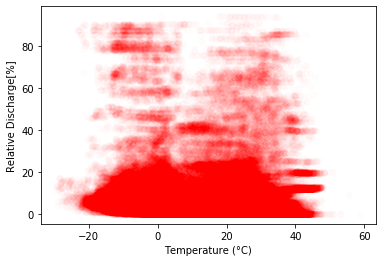

In [50]:
flow = flow.sel(time=slice('1991-01-01', '1995-01-01'),lat=slice(68,5),lon=slice(-8,122))
temp = temp.sel(time=slice('1991-01-01', '1995-01-01'),lat=slice(68,5),lon=slice(-8,122))

rel_flow = flow/(flow.mean(dim='time'))
flow_percentile = rel_flow.reduce(np.nanpercentile, dim='time', q=2.5)


rel_flow = rel_flow.to_dataframe()
temp = temp.to_dataframe()
flow_percentile =flow_percentile.to_dataframe()
flow_percentile=flow_percentile.rename(columns={'dis':'dis_threshold'})

rel_flow = rel_flow.join(flow_percentile,on=['lat','lon'])
rel_flow = rel_flow[rel_flow['dis']<rel_flow['dis_threshold']]
rel_flow_temp = rel_flow.join(temp,on=['lat','lon','time'])


temp_array = [x - 273.15 for x in rel_flow_temp['tasmax']]
flow_array = rel_flow_temp['dis']*100



fig,ax = plt.subplots()
ax.scatter(temp_array,flow_array,color='Red',alpha=0.01)
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Relative Discharge[%]')




## Now checking if their is a relation btw all temperature and flow values

In [78]:
def scatter(temp,flow):
   
    flow_rel = flow/flow.mean('time')

    flow_rel = flow_rel['dis'].values.flatten()

    temp = temp['tasmax'].values.flatten()

    temp = temp[~np.isnan(flow_rel)]
    flow_rel = flow_rel[~np.isnan(flow_rel)]
    flow_rel = flow_rel[temp>273.15]
    temp = temp[temp>273.15]
    
   
    temp = np.array([x - 273.15 for x in temp])
    flow_rel = flow_rel*100
    corr1 = np.corrcoef(temp,flow_rel)
    corr2 = np.corrcoef(temp[flow_rel<100],flow_rel[flow_rel<100])
    corr3 = np.corrcoef(temp[temp>20],flow_rel[temp>20])

    
    fig,ax = plt.subplots()
    ax.scatter(temp,flow_rel,color='Red',alpha=0.01)
    #ax.plot(range(0,40),fit1(range(0,40)))
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Relative Discharge[%]')
    #ax.set_xlim(20,45)
    ax.set_ylim(0,2000)
    
    fig,ax = plt.subplots(figsize=(7,2))
    ax.scatter(temp,flow_rel,color='Red',alpha=0.01)
    #ax.plot(range(0,40),fit1(range(0,40)))
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Relative Discharge[%]')
    #ax.set_xlim(20,45)
    ax.set_ylim(0,100)
    
    
    fig,ax = plt.subplots()
    ax.scatter(temp,flow_rel,color='Red',alpha=0.01)
    #ax.plot(range(0,40),fit1(range(0,40)))
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Relative Discharge[%]')
    ax.set_xlim(20,)
    ax.set_ylim(0,100)
    
    return(corr1,corr2,corr3)


## Box on US
when the relative discharge is below 100%, it means that there can be a loss for power plants

/home/zelie/miniconda3/envs/climada_env/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(array([[ 1.        , -0.19532266],
        [-0.19532266,  1.        ]]),
 array([[ 1.       , -0.2058056],
        [-0.2058056,  1.       ]]),
 array([[ 1.        , -0.08735904],
        [-0.08735904,  1.        ]]))

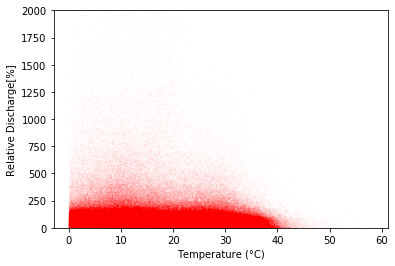

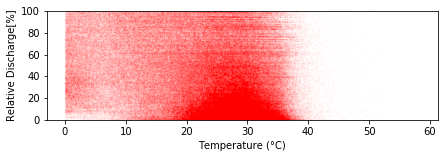

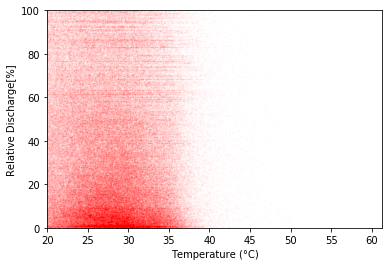

In [76]:
temp = xr.open_dataset('../data/isimip_data/tasmax_gswp3_1991_2000.nc')
flow = xr.open_dataset('../data/isimip_data/h08_gswp3_nobc_hist_pressoc_co2_dis_global_daily_1991_2000.nc')

temp = temp.sel(time=slice('1991-01-01', '1992-01-01'),lat=slice(50,30),lon=slice(-100,-76))
flow = flow.sel(time=slice('1991-01-01', '1992-01-01'),lat=slice(50,30),lon=slice(-100,-76))
scatter(temp,flow)




In [20]:
np.array(temp)[flow<100]

array([ 0.18908081,  0.11473999,  0.23262939, ..., 19.2008606 ,
       18.99642334, 19.28243408])

## Box over France

/home/zelie/miniconda3/envs/climada_env/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(array([[ 1.        , -0.34839704],
        [-0.34839704,  1.        ]]),
 array([[ 1.        , -0.62272951],
        [-0.62272951,  1.        ]]),
 array([[ 1.        , -0.06833807],
        [-0.06833807,  1.        ]]))

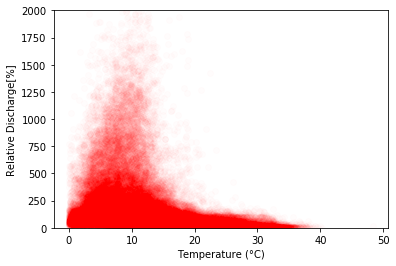

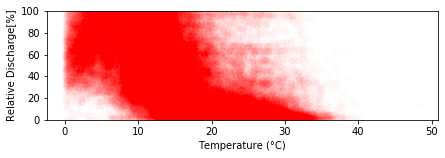

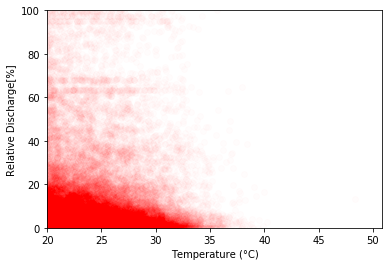

In [79]:
temp = xr.open_dataset('../data/isimip_data/tasmax_gswp3_1991_2000.nc')
flow = xr.open_dataset('../data/isimip_data/h08_gswp3_nobc_hist_pressoc_co2_dis_global_daily_1991_2000.nc')

temp = temp.sel(time=slice('1991-01-01', '1992-01-01'),lat=slice(52,44),lon=slice(-4,9))
flow = flow.sel(time=slice('1991-01-01', '1992-01-01'),lat=slice(52,44),lon=slice(-4,9))
scatter(temp,flow)



In [ ]:
## area near Koeln

/home/zelie/miniconda3/envs/climada_env/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(array([[ 1.        , -0.44093948],
        [-0.44093948,  1.        ]]),
 array([[ 1.       , -0.5164361],
        [-0.5164361,  1.       ]]),
 array([[ 1.        , -0.05139657],
        [-0.05139657,  1.        ]]))

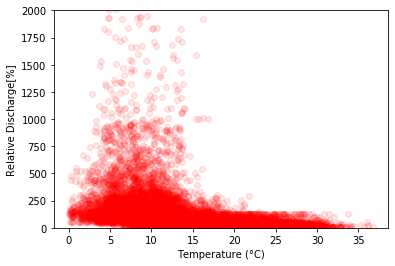

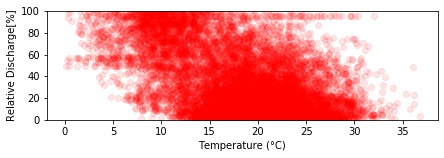

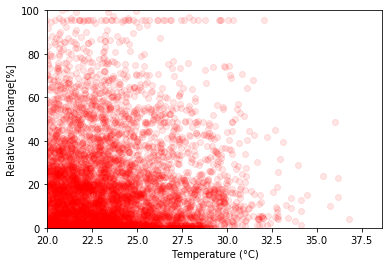

In [71]:
temp = xr.open_dataset('../data/isimip_data/tasmax_gswp3_1991_2000.nc')
flow = xr.open_dataset('../data/isimip_data/h08_gswp3_nobc_hist_pressoc_co2_dis_global_daily_1991_2000.nc')

temp = temp.sel(time=slice('1991-06-01', '1992-09-01'),lat=slice(51,50),lon=slice(-7,8))
flow = flow.sel(time=slice('1991-06-01', '1992-09-01'),lat=slice(51,50),lon=slice(-7,8))
scatter(temp,flow)
